# Iris dataset | EDA | Classifiers benchmarking

The iris dataset was published in 1936 on The use of multiple measurements in taxonomic problems by R.A. Fisher. 

It includes a total of 150 data entries on 3 iris species (50 samples each) and some features of each flower. This dataset is a famous "hello world" dataset for machine learning classification. One of the iris species is linearly seperable from the other two while the remaining two iris species cannot be linearly seperated from each other.

The columns in this dataset are:
* id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

## Hightlights of this notebook

* Exploratory data analysis featuring data visualization was done to investigate the distribution of iris flower features. 
* Correlation analysis was performed. Most of the features are highly correlated (Pearson's coefficient > 0.8). The only exception Sepal width with sepal length
* 8 classification models were constructed with sklearn: logistic regression, k-nearest neighbours, support vector machine, decision tree, random forest, adaboost and xgboost
* The performance metrics of all 8 models were compared. All models scored > 90% test accuracy, Adaboost, random forest performs the best in terms of precision. the precisions were 1 for Iris-setosa and Iris-virginica, and 0.82 for Iris-versicolor
* Simple logistic regression performs better than decision tree on this clean and well-balanced dataset

## Import module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import dataset

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## EDA

### Inspect the dataset

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [46]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.groupby('Species').size()
# check datset balance

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Data Visualization

In [7]:
iris_eda_1 = iris.copy()

In [8]:
iris_eda_1.drop('Id', axis = 1,inplace = True)

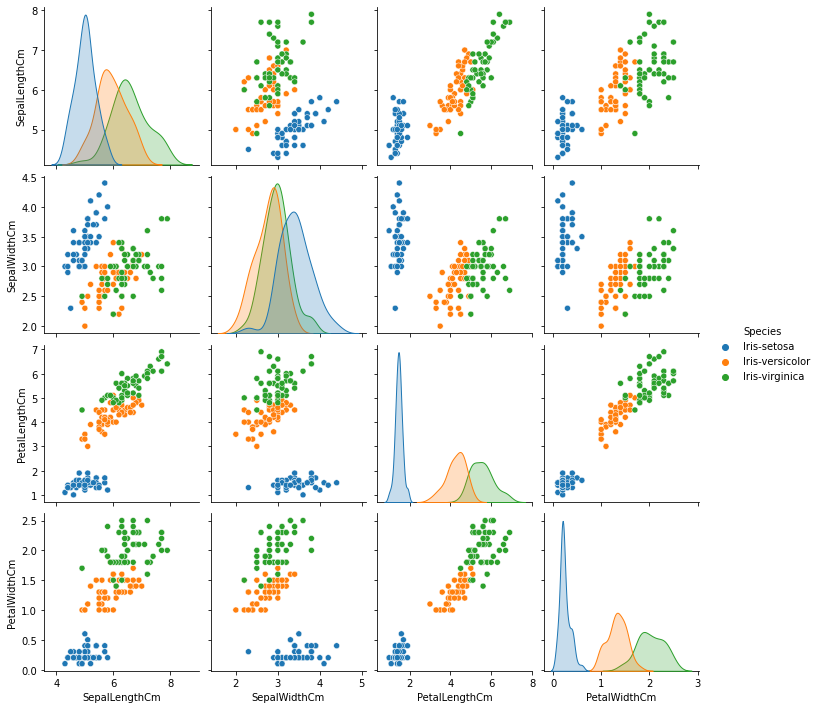

In [9]:
sns.pairplot(iris_eda_1,hue='Species')

In [10]:
iris_eda_1.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

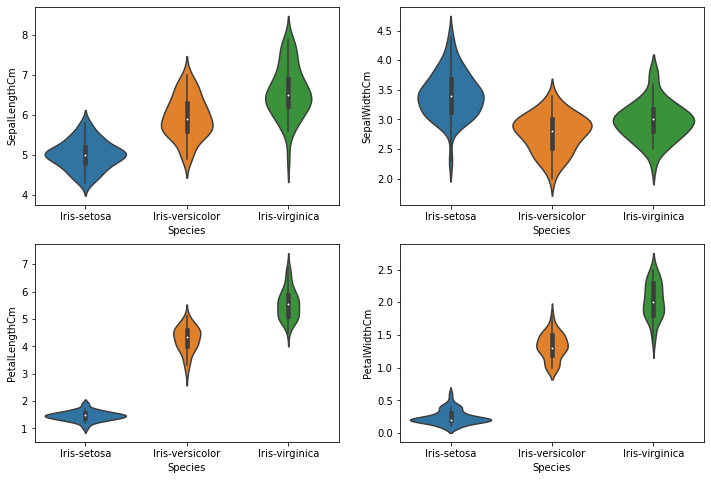

In [11]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

plt.figure(figsize= (12,8))

plt.subplot(2,2,1)
sns.violinplot(x = 'Species', y = features[0], data = iris_eda_1)
plt.subplot(2,2,2)
sns.violinplot(x = 'Species', y = features[1], data = iris_eda_1)
plt.subplot(2,2,3)
sns.violinplot(x = 'Species', y = features[2], data = iris_eda_1)
plt.subplot(2,2,4)
sns.violinplot(x = 'Species', y = features[3], data = iris_eda_1)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

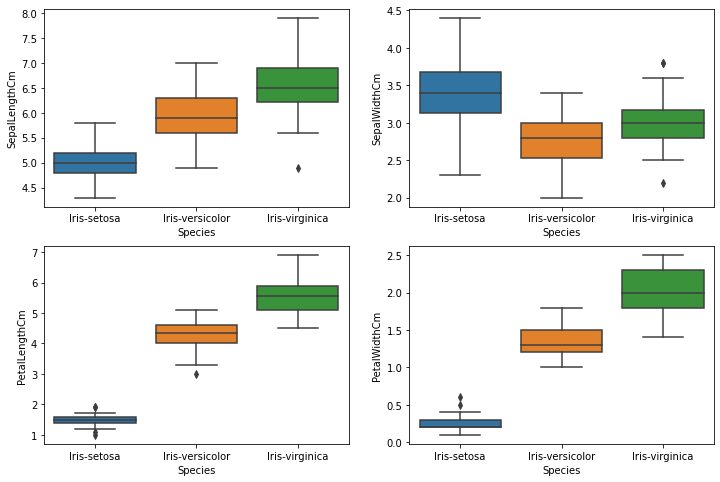

In [12]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

plt.figure(figsize= (12,8))

plt.subplot(2,2,1)
sns.boxplot(x = 'Species', y = features[0], data = iris_eda_1)
plt.subplot(2,2,2)
sns.boxplot(x = 'Species', y = features[1], data = iris_eda_1)
plt.subplot(2,2,3)
sns.boxplot(x = 'Species', y = features[2], data = iris_eda_1)
plt.subplot(2,2,4)
sns.boxplot(x = 'Species', y = features[3], data = iris_eda_1)

### Correlation Analysis

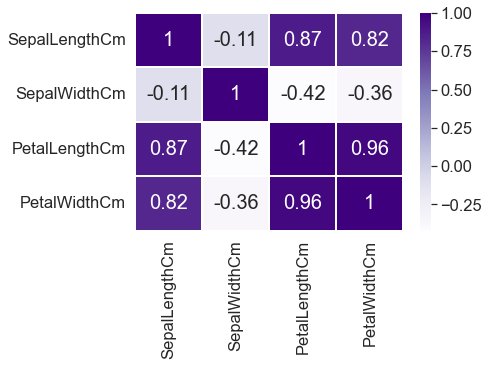

In [13]:

corr_matrix = iris_eda_1.corr()
#plt.figure(figsize=(40,40))
sns.set(font_scale=1.5)
#color = plt.get_cmap('viridis').copy()   # default color
#color.set_bad('lightblue') 
sns.heatmap(corr_matrix, annot=True, linewidth=0.4,annot_kws={"size": 20}, cmap='Purples')
#plt.savefig('corr_heatmap')
plt.show()

## Preprocessing

In [14]:
df = iris.copy()
X = df.iloc[:, 1:5]
y = df.iloc[:, -1]

In [15]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
map_y_to_numerical = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}

In [17]:
y = y.map(map_y_to_numerical)

In [18]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Models

### Predict function

In [19]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score


def predict_and_performance_metric(clf, X_train, X_test, y_train, y_test, train=True):
    print ("*****************************************************************\n")
    if train: 
        X = X_train
        y = y_train
        print("Train Result:\n")
    else:
        X = X_test
        y = y_test
        print("Test Result:\n")
        
    # for roc calculation    
    lb = preprocessing.LabelBinarizer()
    lb.fit(y)
    
    predicted_y = clf.predict(X)
    
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y, predicted_y)))
    print("Classification Report: \n {}\n".format(classification_report(y,predicted_y)))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(y, predicted_y)))
    print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y), lb.transform(predicted_y))))
    
    cv_result = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    avg_accuracy = np.mean(cv_result)
    accuracy_sd = np.std(cv_result)
    print("Average Accuracy: \t {0:.4f}".format(avg_accuracy))
    print("Accuracy SD: \t\t {0:.4f}".format(accuracy_sd))
    
    return cv_result

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
model_log_reg = LogisticRegression(verbose=0, max_iter=200)
model_log_reg.fit(X_train,y_train)
predict_and_performance_metric(model_log_reg, X_train, X_test, y_train, y_test, train=True)
predict_and_performance_metric(model_log_reg, X_train, X_test, y_train, y_test, train=False)
metric_log_reg = predict_and_performance_metric(model_log_reg, X_train, X_test, y_train, y_test, train=False)

*****************************************************************

Train Result:

accuracy score: 0.9524

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.94      0.92      0.93        36
           2       0.91      0.94      0.93        34

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105


Confusion Matrix: 
 [[35  0  0]
 [ 0 33  3]
 [ 0  2 32]]

ROC AUC: 0.9644

Average Accuracy: 	 0.9609
Accuracy SD: 		 0.0479
*****************************************************************

Test Result:

accuracy score: 0.9556

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93        16

    accuracy  

### KNN classifer

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)
predict_and_performance_metric(model_knn, X_train, X_test, y_train, y_test, train=True)
predict_and_performance_metric(model_knn, X_train, X_test, y_train, y_test, train=False)
metric_knn = predict_and_performance_metric(model_knn, X_train, X_test, y_train, y_test, train=False)

*****************************************************************

Train Result:

accuracy score: 0.9714

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      0.92      0.96        36
           2       0.92      1.00      0.96        34

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105


Confusion Matrix: 
 [[35  0  0]
 [ 0 33  3]
 [ 0  0 34]]

ROC AUC: 0.9791

Average Accuracy: 	 0.9609
Accuracy SD: 		 0.0479
*****************************************************************

Test Result:

accuracy score: 0.9556

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93        16

    accuracy  

### SVM

In [22]:
from sklearn.svm import SVC
model_svc = SVC(degree=4)
model_svc.fit(X_train, y_train)
predict_and_performance_metric(model_svc, X_train, X_test, y_train, y_test, train=True)
predict_and_performance_metric(model_svc, X_train, X_test, y_train, y_test, train=False)
metric_svm = predict_and_performance_metric(model_svc, X_train, X_test, y_train, y_test, train=False)

*****************************************************************

Train Result:

accuracy score: 0.9619

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.94      0.94      0.94        36
           2       0.94      0.94      0.94        34

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105


Confusion Matrix: 
 [[35  0  0]
 [ 0 34  2]
 [ 0  2 32]]

ROC AUC: 0.9714

Average Accuracy: 	 0.9518
Accuracy SD: 		 0.0658
*****************************************************************

Test Result:

accuracy score: 0.9333

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      1.00      0.90        14
           2       1.00      0.81      0.90        16

    accuracy  

### Decision Trees

In [23]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
predict_and_performance_metric(model_tree, X_train, X_test, y_train, y_test, train=True)
predict_and_performance_metric(model_tree, X_train, X_test, y_train, y_test, train=False)
metric_tree = predict_and_performance_metric(model_tree, X_train, X_test, y_train, y_test, train=False)

*****************************************************************

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        34

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105


Confusion Matrix: 
 [[35  0  0]
 [ 0 36  0]
 [ 0  0 34]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9518
Accuracy SD: 		 0.0483
*****************************************************************

Test Result:

accuracy score: 0.9333

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      1.00      0.90        14
           2       1.00      0.81      0.90        16

    accuracy  

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
predict_and_performance_metric(model_rf, X_train, X_test, y_train, y_test, train=True)
predict_and_performance_metric(model_rf, X_train, X_test, y_train, y_test, train=False)
metric_rf = predict_and_performance_metric(model_rf, X_train, X_test, y_train, y_test, train=False)

*****************************************************************

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        34

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105


Confusion Matrix: 
 [[35  0  0]
 [ 0 36  0]
 [ 0  0 34]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9609
Accuracy SD: 		 0.0479
*****************************************************************

Test Result:

accuracy score: 0.9333

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      1.00      0.90        14
           2       1.00      0.81      0.90        16

    accuracy  

### AdaBoost

In [25]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)
predict_and_performance_metric(model_ada, X_train, X_test, y_train, y_test, train=True)
predict_and_performance_metric(model_ada, X_train, X_test, y_train, y_test, train=False)
metric_ada = predict_and_performance_metric(model_ada, X_train, X_test, y_train, y_test, train=False)

*****************************************************************

Train Result:

accuracy score: 0.9714

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      0.97      0.96        36
           2       0.97      0.94      0.96        34

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105


Confusion Matrix: 
 [[35  0  0]
 [ 0 35  1]
 [ 0  2 32]]

ROC AUC: 0.9784

Average Accuracy: 	 0.9518
Accuracy SD: 		 0.0483
*****************************************************************

Test Result:

accuracy score: 0.9333

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      1.00      0.90        14
           2       1.00      0.81      0.90        16

    accuracy  

### xgboost

In [26]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(max_depth=5, n_estimators=1000, learning_rate=0.2,n_jobs=-1)
model_xgb.fit(X_train, y_train)
predict_and_performance_metric(model_xgb, X_train, X_test, y_train, y_test, train=True)
predict_and_performance_metric(model_xgb, X_train, X_test, y_train, y_test, train=False)
metric_xgb = predict_and_performance_metric(model_xgb, X_train, X_test, y_train, y_test, train=False)

*****************************************************************

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        34

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105


Confusion Matrix: 
 [[35  0  0]
 [ 0 36  0]
 [ 0  0 34]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9609
Accuracy SD: 		 0.0479
*****************************************************************

Test Result:

accuracy score: 0.9333

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      1.00      0.90        14
           2       1.00      0.81      0.90        16

    accuracy  

## Benchmarking

In [27]:
performances = [metric_log_reg, metric_knn, metric_svm, 
               metric_tree,metric_rf,metric_ada,metric_xgb]

In [29]:
mean_accuracy = [np.mean(score) for score in performances]

[0.9550000000000001,
 0.96,
 0.9349999999999999,
 0.93,
 0.9800000000000001,
 0.9800000000000001,
 0.9400000000000001]

In [30]:
std = [np.std(score) for score in performances]

[0.09069178573608527,
 0.07999999999999999,
 0.10012492197250392,
 0.10770329614269007,
 0.05999999999999999,
 0.05999999999999999,
 0.09165151389911678]

In [31]:
df = pd.DataFrame()
df['model'] = ['log_reg','knn','svm','decision_tree','random_forest','adaboost','xgb']
df['mean_accuracy'] = mean_accuracy
df['scores']= performances
df['std'] = std

In [56]:
df.sort_values(by='mean_accuracy', ascending=False, inplace=True)
df

,model,mean_accuracy,scores,std
1,random_forest,0.980,"[1.0, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.080000
4,adaboost,0.980,"[1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.060000
2,knn,0.960,"[1.0, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.100125
3,log_reg,0.955,"[1.0, 1.0, 0.8, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0,...",0.107703
5,xgb,0.940,"[1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.060000
6,svm,0.935,"[0.8, 1.0, 0.8, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, ...",0.091652
0,decision_tree,0.930,"[1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.090692


<AxesSubplot:xlabel='mean_accuracy', ylabel='model'>

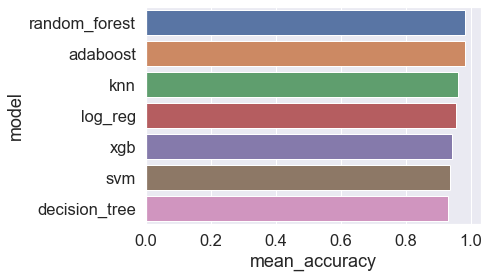

In [33]:
errorbars = df['std']
sns.barplot(data=df, y='model', x='mean_accuracy')

<BarContainer object of 7 artists>

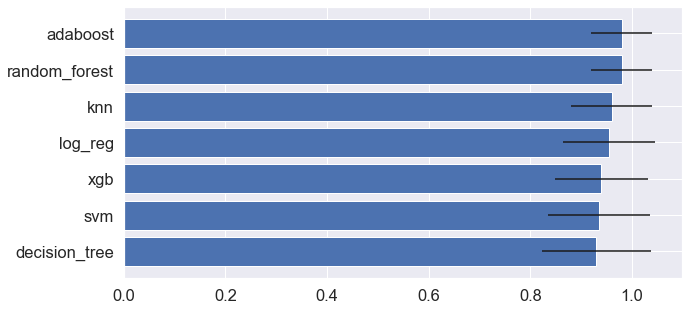

In [34]:
# alternative representation with error bar
fig, ax = plt.subplots(figsize = (10,5))
sns.set(font_scale=1)
df.sort_values(by='mean_accuracy', ascending=True, inplace=True)
ax.barh( df['model'],df['mean_accuracy'], xerr=df['std'])

## Prediction



Adaboost and random forest scored the highest in cross validation accuracy score. Both of them misidentified 3 observations (see confusion matrix) above) with precision = 0.82 for identifying Iris-versicolor.

In [58]:
y_predicted = model_rf.predict(X_test)
y_predicted

array([2, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 0,
       0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1,
       1], dtype=int64)

In [59]:
inverse_map= {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}
results = pd.DataFrame()
results['result'] = y_predicted
results['result'] = results['result'].map(inverse_map)
results

,result
0,Iris-virginica
1,Iris-setosa
2,Iris-versicolor
3,Iris-versicolor
4,Iris-versicolor
5,Iris-setosa
6,Iris-virginica
7,Iris-versicolor
8,Iris-virginica
9,Iris-setosa
